# pandas
## Introdución
Pandas é unha biblioteca de python enfocada á análise de datos. Está deseñada para traballar con datos tabulares (filas e columnas) de forma eficiente e expresiva. Permíteche ler datos de múltiples fontes, limpá-los, transformá-los, combi-ná-los e facer análises estatísticas básicas ou avanzadas nun fluxo continuo. 

**Principais características**
- **Produtividade**: moitas operacións complexas resólvense con poucas instrucións.
- **Flexibilidade**: admite datos heteroxéneos (números, texto, datas, categorías…).
- **Integración**: con NumPy (cálculo), Matplotlib/Seaborn (gráficos), Scikit-learn (ML), SQL/Excel/Parquet/CSV (I/O).
- **Modelo mental claro**: pensar en columnas e grupos (estilo SQL/Excel), pero con a potencia da linguaxe Python.
Imos ver unha serie de conceptos introductorios.
### Tipo de datos
En *pandas* traballamos con datos tabulares, semellantes aos que podemos atopar en follas de cálculo ou bases de datos. En pandas, as táboas denomínanse **DataFrames**.
![Texto alternativo](img/dataframe.png)

Un **DataFrame** é unha estrutura de datos bidimensional que pode almacenar datos de diferentes tipos (carácteres, enteiros, coma flotante, e mais).



In [1]:
# Creación dun DataFrame
import pandas as pd
df = pd.DataFrame(
    {
        "nome": ["Pepe Pérez Pérez", "Paloma Pato Perdiz", "Santiago Vigo Noya"] ,
        "idade": [50, 40, 48],
        "sexo": ["home", "muller", "home"]
    }
)
df



,nome,idade,sexo
0,Pepe Pérez Pérez,50,home
1,Paloma Pato Perdiz,40,muller
2,Santiago Vigo Noya,48,home


Cada columna dun **DataFrame** denomínase **Series**.

![series](img/01_table_series.svg)

Para seleccionar unha columna dun **DataFrame** emprégase o operador **[]**.
Tamén se poden crear series a partir dun array.

In [2]:
# Seleccionando a clumna dun Dataframe:
df["nome"]

0      Pepe Pérez Pérez
1    Paloma Pato Perdiz
2    Santiago Vigo Noya
Name: nome, dtype: object

In [3]:
# A partir dun array
idades = pd.Series([50,40,48],name="idade")
idades

0    50
1    40
2    48
Name: idade, dtype: int64

### Escritura e lectura de datos en pandas
**pandas** soporta a integración dunha gran cantidade de formatos de arquivo e fontes de datos (**csv**, **sql**, **json**, **parquet**, etc.). Para importar datos, habitualmente emprégase unha función co prefixo **read_** seguido do formato ou a orixe de datos. Para exportar, pola súa banda, emprégase o sufixo **to_**.
![Texto alternativo](img/02_io_readwrite.svg)


In [3]:
# Lectura dun csv
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
# Escritura a parquet
penguins_df.to_parquet("data/penguins.parquet")

### Selección de subconxuntos dunha táboa.
**pandas** proporciona métodos para seleccionar subconxuntos dunha táboa en base a filas ou columnas.

![Texto alternativo](img/03_subset_columns_rows.svg)

Como xa se explicou anteriormente, cada columna dun **DataFrame** é unha estrutura de datos coñecida como **Series**. Tamén se poden selecionar varias columnas.

In [6]:
# Exemplo selección columnas
penguins_df[["species","island"]]


,species,island
0,Adelie,Torgersen
1,Adelie,Torgersen
2,Adelie,Torgersen
3,Adelie,Torgersen
4,Adelie,Torgersen
...,...,...
339,Gentoo,Biscoe
340,Gentoo,Biscoe
341,Gentoo,Biscoe
342,Gentoo,Biscoe


In [18]:
# Exemplo filtrado filas
penguins_df[penguins_df["species"] == "gentoo"]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


### Creación de gráficos en pandas
Para crear representacións gráficas dos nosos datos en **pandas** podemos empregar as bibliotecas **matplotlib** e **seaborn**. Esta última permite facer gráficos máis avanzados e atractivos visualmente. O primeiro paso sería importar os paquetes necesarios.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

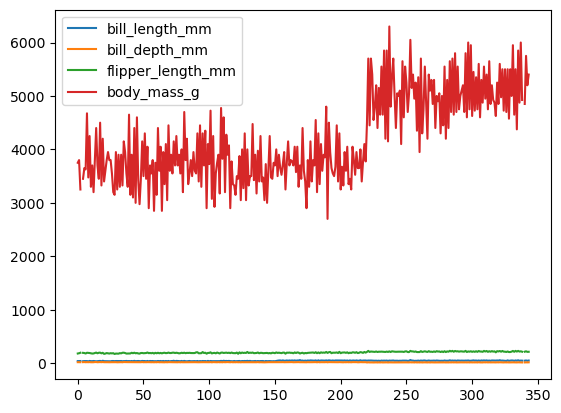

In [7]:
# gráfico básico
penguins_df.plot()


<Axes: >

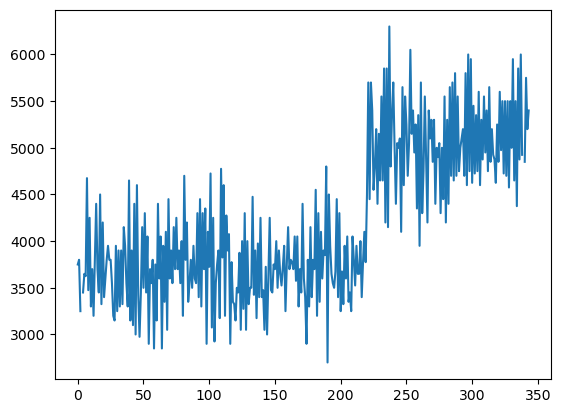

In [8]:
# Selección de columna
penguins_df["body_mass_g"].plot()

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

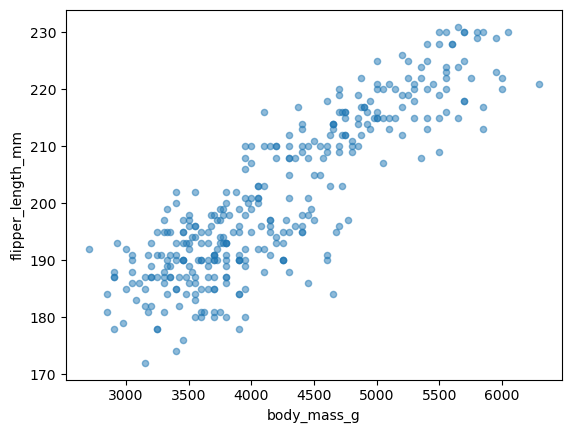

In [9]:
# dispersión relacionando datos de dúas columnas
penguins_df.plot.scatter(x="body_mass_g",y="flipper_length_mm", alpha=0.5)

Text(0.5, 1.0, 'Distribución da lonxitude das aletas por especie')

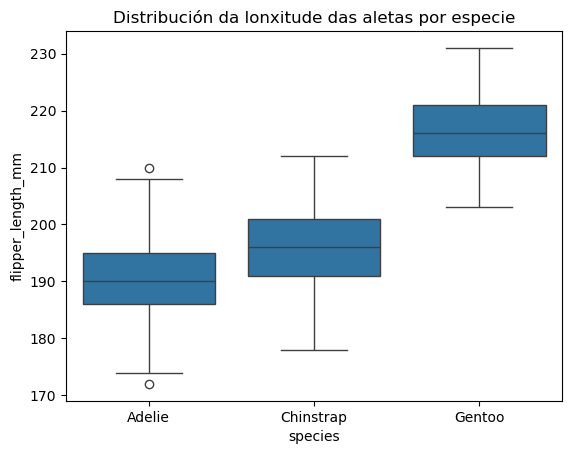

In [11]:
# Gráfico de caixas empregando seaborn
sns.boxplot(x="species", y="flipper_length_mm", data=penguins_df)
plt.title("Distribución da lonxitude das aletas por especie")

### Creación de columnas derivadas
A creación de columnas novas a partir dos datos existentes é sinxela e directa.

![columna nova](img/05_newcolumn_2.svg)

In [4]:
# Exemplo columna derivada
penguins_df["bill_length_in"] = penguins_df["bill_length_mm"]*0.039
penguins_df


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_in
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1.5249
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1.5405
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1.5717
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1.4313
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,1.8252
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,1.9656
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,1.7628


### Cálculo de estadísticas
Hay una variedad de estadísticas que se pueden aplicar sobre columnas numéricas. Por lo general, se excluyen valores perdidos.

![agregación](img/06_aggregate.svg)

Tamén se permite calcular estadísticas agregadas agrupando por categorías, para o cal adoita empregarse o método **groupby**. Séguese o patrón **split-apply-combine**:
- **split**: "romper" os datos en grupos.
- **apply**: aplicar unha función a cada grupo por separado.
- **combine**: combinar os resultados nunha estrutura de datos.

![agregación](img/06_groupby.svg)

Algunhas funcións realizan operacións de agrupación específicas. Por exemplo, **value_counts** é unha abreviación que equivale a realizar un **groupby** e, despois, a función **count**.


In [21]:
# Media sinxela
print ("\nMedia:")
print(penguins_df[["bill_length_mm", "bill_depth_mm"]].mean())

# Media sobre agrupación
print ("\nMedia agrupada")
print(penguins_df.groupby("species")[["bill_length_mm", "bill_depth_mm"]].mean())

# contar membros de cada categoría.
print ("\nvalue_counts")
print(penguins_df["species"].value_counts())


Media:
bill_length_mm    43.92193
bill_depth_mm     17.15117
dtype: float64

Media agrupada
           bill_length_mm  bill_depth_mm
species                                 
Adelie          38.791391      18.346358
Chinstrap       48.833824      18.420588
Gentoo          47.504878      14.982114

value_counts
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


### Modificar a estrutura das táboas
**pandas** permite modificar a estrutura dunha táboa pasando dun formato ancho (**wide**) a un longo (**long**) ou viceversa.
- **wide**: Cada variable (exemplo: tipo de medida) ten a súa propia columna. Cada fila representa unha unidade de observación. Moi lexible polos humanos pero pouco axeitado para análises estadísticas. Para convertir un **DataFrame** a este formato emprégase a función **pivot**.
![pivot](img/07_pivot.svg)
  
- **long**: Todas as medidas dunha unidade están na mesma columna (exemplo: *value*). O tipo de medidas gárdase nunha columna separada (exemplo: *measurement*). Cada fila é unha observación dun par unidade, variable. Máis flexible para estadísticas, gráficos e agrupación. Para convertir un **DataFrame** a este formato emprégase a función **melt**.
![melt](img/07_melt.svg)


In [27]:
# wide -> long
# Engadimos un ID único
penguins_df = penguins_df.reset_index(names="row_id")
penguins_long = penguins_df.melt(
    id_vars=["row_id","species","island"],
    value_vars=["bill_length_mm", "bill_depth_mm"],
    var_name = "measurement",
    value_name = "value"
)
penguins_long

,row_id,species,island,measurement,value
0,0,Adelie,Torgersen,bill_length_mm,39.1
1,1,Adelie,Torgersen,bill_length_mm,39.5
2,2,Adelie,Torgersen,bill_length_mm,40.3
3,3,Adelie,Torgersen,bill_length_mm,NaN
4,4,Adelie,Torgersen,bill_length_mm,36.7
...,...,...,...,...,...
683,339,Gentoo,Biscoe,bill_depth_mm,NaN
684,340,Gentoo,Biscoe,bill_depth_mm,14.3
685,341,Gentoo,Biscoe,bill_depth_mm,15.7
686,342,Gentoo,Biscoe,bill_depth_mm,14.8


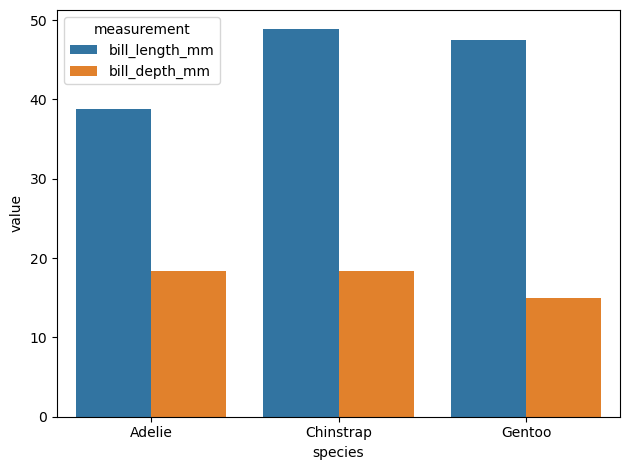

In [31]:
# Exemplo de agrupación e gráfico sobre formato long
import seaborn as sns
import matplotlib.pyplot as plt

penguins_long.groupby(["species","measurement"])["value"].mean()

sns.barplot(data=penguins_long, x="species", y="value", hue="measurement", estimator="mean", errorbar=None)
plt.tight_layout()
plt.show()

In [28]:
# long -> wide
penguins_wide = penguins_long.pivot(
    index=["row_id", "species", "island"],   # índice composto
    columns="measurement",         # cada medida pasa a ser unha columna
    values="value"                 # os valores que enchen as columnas
)

penguins_wide.head()


,,measurement,bill_depth_mm,bill_length_mm
row_id,species,island,,
0,Adelie,Torgersen,18.7,39.1
1,Adelie,Torgersen,17.4,39.5
2,Adelie,Torgersen,18.0,40.3
3,Adelie,Torgersen,NaN,NaN
4,Adelie,Torgersen,19.3,36.7


### Combinar datos de diferentes táboas
Imos ver dous casos: *concatenación* e *join*.
#### Concatenación
Permite combinar dúas táboas coa mesma estrutura nunha soa táboa.
![melt](img/08_concat_row.svg)

In [35]:
# Concatenación:
penguins_fake = pd.DataFrame([
    {"species":"Adelie",   "island":"Biscoe",   "bill_length_mm":38.2, "bill_depth_mm":18.5, "flipper_length_mm":182, "body_mass_g":3725, "sex":"Male",   "year":2008},
    {"species":"Gentoo",   "island":"Biscoe",   "bill_length_mm":46.1, "bill_depth_mm":15.0, "flipper_length_mm":214, "body_mass_g":5050, "sex":"Female", "year":2008},
    {"species":"Chinstrap","island":"Dream",    "bill_length_mm":50.0, "bill_depth_mm":18.2, "flipper_length_mm":200, "body_mass_g":3550, "sex":"Male",   "year":2009}
])
penguins_all = pd.concat([penguins_df, penguins_fake], ignore_index=True)
penguins_all.tail()

,row_id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_in,year
342,342.0,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,1.7628,NaN
343,343.0,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE,1.9461,NaN
344,NaN,Adelie,Biscoe,38.2,18.5,182.0,3725.0,Male,NaN,2008.0
345,NaN,Gentoo,Biscoe,46.1,15.0,214.0,5050.0,Female,NaN,2008.0
346,NaN,Chinstrap,Dream,50.0,18.2,200.0,3550.0,Male,NaN,2009.0


#### join
**pandas** permite combinar táboa en base aos valores dun campo de cada unha das táboas. Ao igual que en *sql* e noutros entornos, hai varios tipos de combinacións: inner, left, right, outer...
![melt](img/08_merge_left.svg)

In [33]:
species_info = pd.DataFrame({
    "species": ["Adelie","Chinstrap","Gentoo"],
    "scientific_name": ["Pygoscelis adeliae","Pygoscelis antarcticus","Pygoscelis papua"],
    "diet": ["krill","krill + peixe","peixe"]
})

penguin_species = penguins_df.merge(species_info, on="species", how="inner")
penguin_species

,row_id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_in,scientific_name,diet
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1.5249,Pygoscelis adeliae,krill
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1.5405,Pygoscelis adeliae,krill
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1.5717,Pygoscelis adeliae,krill
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,Pygoscelis adeliae,krill
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1.4313,Pygoscelis adeliae,krill
...,...,...,...,...,...,...,...,...,...,...,...
339,339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN,Pygoscelis papua,peixe
340,340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,1.8252,Pygoscelis papua,peixe
341,341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,1.9656,Pygoscelis papua,peixe
342,342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,1.7628,Pygoscelis papua,peixe


### manexar datos temporais
*pandas* permite convertir os daotos temporais ao formato **datetime** co método **to_datetime**. Permítense operacións como calcular intervalos de tempo ou agregacións estadísticas por períodos de tempo.

In [40]:
# 1) Ler e converter a datetime
air_quality = pd.read_csv("data/air_quality_no2_long.csv")
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])  # dtype: datetime64[ns, UTC]

# 2) Info básica de rango temporal e duración
start, end = air_quality["datetime"].min(), air_quality["datetime"].max()
duration = end - start  # pandas.Timedelta
print (duration)
# 3) Engadir compoñente temporal e calcular medias por weekday (0=luns)
air_quality["month"] = air_quality["datetime"].dt.month
mean_by_wd_loc = air_quality.groupby([air_quality["datetime"].dt.weekday, "location"])["value"].mean()
print(mean_by_wd_loc)

44 days 23:00:00
datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64


### manexar datos de texto
No procesado de datos unha fase importante é a de limpeza, consistente en operacións como separar unha cadea en varias, pasar a minúsculas, etc. *pandas* permite facer as operacións típicas de *strings*.

In [36]:
penguins_df["species"].str.lower()

0      adelie
1      adelie
2      adelie
3      adelie
4      adelie
        ...  
339    gentoo
340    gentoo
341    gentoo
342    gentoo
343    gentoo
Name: species, Length: 344, dtype: object